# Using local storage as audio cache

In [1]:
# Login
from omapy.api import oma

# API endpoint
url = "http://localhost:8080/"
# url = "http://omatest.eu-central-1.elasticbeanstalk.com/"
# Login with username, password and flag that indicates if certificates are validated or not. False: useful for non-production
login = oma.login(url, "oma", "=PSe?sZ-ymp6mE>2", False)
# response code 200
print(login)

<Response [200]>


# Directories

$SCRIPT_PATH/omacache/recording


In [2]:
params = {"recording": 21288, "type": "wav"}

audio_file = oma.recording_get_audio(params)

print(audio_file.name)




opened
omacache/recording/21288.wav


# cutting audio
loading whole track to cache and then slice locally.

OMA user interface shows 30 second windows.


In [3]:
import librosa

sr = librosa.core.get_samplerate(audio_file.name)
print("sr", sr)
y, sr = librosa.load(audio_file.name, sr=sr, mono=False)
print("sr", sr)



sr 44100
sr 44100


In [4]:
# cutting parts

print(y.size)

left_channel = y[0, :]

print(left_channel.shape)

84733152
(42366576,)


In [5]:
# pick area of interest

from_s = 30
to_s = 32

from_sample = from_s * sr
to_sample = to_s * sr

cut_y = y[:,from_sample:to_sample]
cut_left = cut_y[0]
cut_right = cut_y[1]
cut_y.shape


(2, 88200)

In [7]:
from matplotlib import pyplot as plt
import matplotlib
import librosa.display



def create_wave_sample(y, sr, from_sample, to_sample, recording):
    cut_left = y[0]
    cut_right = y[1]
    # data offset for drawing
    # left on top, right at the bottom
    y_harm_left, y_perc_left = librosa.effects.hpss(np.asfortranarray(cut_left))
    y_harm_right, y_perc_right = librosa.effects.hpss(np.asfortranarray(cut_right))


    height = 3
    width = 10

    # https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-matplotlib-pyplot-figure-vs-matplotlib-figure-frame
    # remove frame 
    fig = plt.figure(frameon=False, figsize=(width, height))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')

    ax.set_ylim([-1,1])
    librosa.display.waveplot(np.asfortranarray(y_harm_left), x_axis="none", sr=sr, alpha=0.25)
    librosa.display.waveplot(np.asfortranarray(y_perc_left), x_axis="none", sr=sr, color="b", alpha=0.5)

    #librosa.display.waveplot(np.asfortranarray(y_harm_right - 1), x_axis="none", sr=sr, alpha=0.25)
    #librosa.display.waveplot(np.asfortranarray(y_perc_right - 1), x_axis="none", sr=sr, color="b", alpha=0.5)

    fname = "wave-left.png"
    matplotlib.pyplot.savefig(fname)


    params = {"recording": recording, "type": "wave-left", "from_sample": from_sample, "to_sample": to_sample, "sample_rate": sr}
    files = {
            "file": (fname, open(fname, 'rb'), 'image/png', {'Expires': '0'})
            #"file": (mp3_file, open(mp3_file, 'rb'), 'audio/mpeg', {'Expires': '0'})
        }

    image_file = oma.recording_add_image(params, files)
    print(files)


    fig = plt.figure(frameon=False, figsize=(width, height))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')

    ax.set_ylim([-1,1])

    librosa.display.waveplot(np.asfortranarray(y_harm_right), x_axis="none", sr=sr, alpha=0.25)
    librosa.display.waveplot(np.asfortranarray(y_perc_right), x_axis="none", sr=sr, color="r", alpha=0.5)

    fname = "wave-right.png"
    matplotlib.pyplot.savefig(fname)

    params = {"recording": recording, "type": "wave-right", "from_sample": from_sample, "to_sample": to_sample, "sample_rate": sr}
    files = {
            "file": (fname, open(fname, 'rb'), 'image/png', {'Expires': '0'})
            #"file": (mp3_file, open(mp3_file, 'rb'), 'audio/mpeg', {'Expires': '0'})
        }
    image_file = oma.recording_add_image(params, files)
    print(files)
    plt.clf()
    


In [ ]:
#upload images
import numpy as np

from_s = 0
to_s = 32


samples_per_image = 44100 # i second
number_of_samples = int(y.size / samples_per_image)
print("number_of_samples", number_of_samples)

for i in range(number_of_samples):
    print(i)
    from_sample = i * samples_per_image
    to_sample = (i+1) * samples_per_image
    cut_y = y[:,from_sample:to_sample]
    create_wave_sample(cut_y, sr, from_sample, to_sample, 21288)
    plt.clf()
    
    




number_of_samples 1921
0
{'file': ('wave-left.png', <_io.BufferedReader name='wave-left.png'>, 'image/png', {'Expires': '0'})}
{'file': ('wave-right.png', <_io.BufferedReader name='wave-right.png'>, 'image/png', {'Expires': '0'})}
1
{'file': ('wave-left.png', <_io.BufferedReader name='wave-left.png'>, 'image/png', {'Expires': '0'})}
{'file': ('wave-right.png', <_io.BufferedReader name='wave-right.png'>, 'image/png', {'Expires': '0'})}
2
{'file': ('wave-left.png', <_io.BufferedReader name='wave-left.png'>, 'image/png', {'Expires': '0'})}
{'file': ('wave-right.png', <_io.BufferedReader name='wave-right.png'>, 'image/png', {'Expires': '0'})}
3
{'file': ('wave-left.png', <_io.BufferedReader name='wave-left.png'>, 'image/png', {'Expires': '0'})}
{'file': ('wave-right.png', <_io.BufferedReader name='wave-right.png'>, 'image/png', {'Expires': '0'})}
4
{'file': ('wave-left.png', <_io.BufferedReader name='wave-left.png'>, 'image/png', {'Expires': '0'})}
{'file': ('wave-right.png', <_io.Buffered

# Embedding Audio of the Area of Interest

In [56]:
import IPython.display as ipd
ipd.Audio(cut_y, rate=sr)

In [ ]:
# going mono

In [61]:
mono = librosa.to_mono(cut_y)
mono.shape

(882000,)

In [62]:
ipd.Audio(mono, rate=sr)

In [57]:
video_frame_rate = 1 / 60.0  # Hz
audio_samples_per_video_frame = sr * video_frame_rate
print("Audio samples per video frame", audio_samples_per_video_frame)
audio_samples_per_video_frame

Audio samples per video frame 735.0


735.0

In [58]:
audio_samples_per_video_frame = 100
video_frame_rate = int(sr / audio_samples_per_video_frame)
video_frame_rate

441

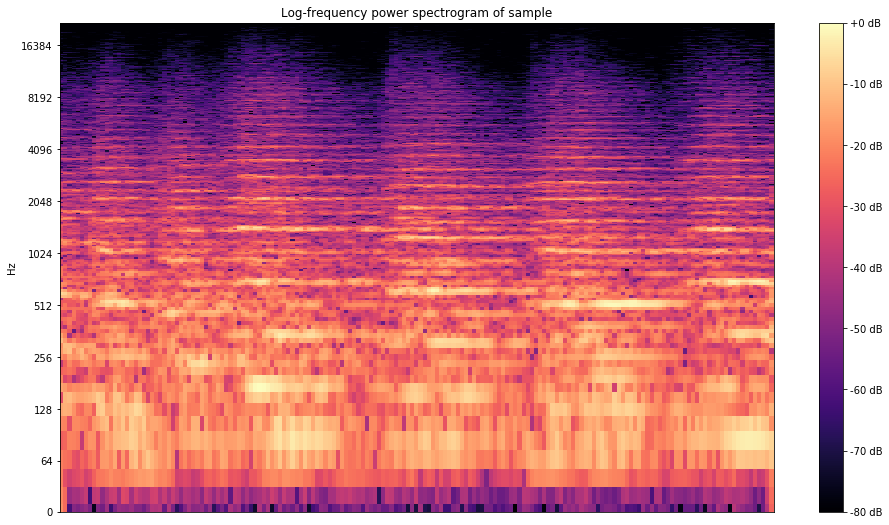

In [59]:
# FFT
import matplotlib

size = 44100

sample = mono[0:size * 2]

# 50 samples

D = librosa.amplitude_to_db(np.abs(librosa.stft(sample)), ref=np.max)
fig = plt.figure(figsize=(16, 9))
librosa.display.specshow(D, y_axis='log', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram of sample')

fname = "image.png"
matplotlib.pyplot.savefig(fname)

In [49]:
import cv2

image = cv2.imread(fname)

In [19]:
image.shape

(648, 1152, 3)

In [20]:
height , width , layers =  image.shape



# Making a Video



In [69]:
from vidgear.gears import WriteGear
from vidgear.gears import VideoGear
import cv2

desired_frame_rate = 60

watch_window_size = 5 * sr  # 2 seconds: 88200

audio_samples_per_video_frame = int(sr / desired_frame_rate)
print("audio_samples_per_video_frame", audio_samples_per_video_frame)

# audio_samples_per_video_frame = 100
video_frame_rate = desired_frame_rate
print("video frame rate", video_frame_rate)


num_audio_frames = mono.shape[0]
num_video_frames = int((num_audio_frames / sr) * desired_frame_rate)
print("num_video_frames", num_video_frames)

for i in range(0, num_video_frames - 1):
    start = i * audio_samples_per_video_frame
    end = i * audio_samples_per_video_frame + watch_window_size
    # print(i, start, end)


audio_samples_per_video_frame 735
video frame rate 60
num_video_frames 1200


In [70]:
output_params = {"-fourcc":"MJPG", "-fps": video_frame_rate}
writer = WriteGear(output_filename = 'Output.mp4', compression_mode = False, logging = True, **output_params) #Define writer


for i in range(0, num_video_frames - 1):
    start = i * audio_samples_per_video_frame
    end = i * audio_samples_per_video_frame + watch_window_size
    # print(i, start, end)
    if end > num_audio_frames:
        break
    sample = mono[start:end]
    # print(sample.shape)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(sample)), ref=np.max)
    plt.figure(figsize=(16, 9))
    fig, ax = plt.subplots( nrows=1, ncols=1 )
    ax = librosa.display.specshow(D, y_axis='log', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log-frequency power spectrogram of sample')
    fname = "image.png"
    matplotlib.pyplot.savefig(fname)
    plt.clf()
    image = cv2.imread(fname)
    writer.write(image)

writer.close()
print("Done")

WriteGear :: DEBUG :: Compression Mode is disabled, Activating OpenCV built-in Writer!
WriteGear :: DEBUG :: InputFrame => Height:288 Width:432 Channels:3
WriteGear :: DEBUG :: FILE_PATH: /home/martin/Workspace/oma/jupyter/input/Output.mp4, FOURCC = 1196444237, FPS = 60, WIDTH = 432, HEIGHT = 288, BACKEND = 
WriteGear :: INFO :: RGBA and 16-bit grayscale video frames are not supported by OpenCV yet, switch to `compression_mode` to use them!
WriteGear :: DEBUG :: Terminating WriteGear Processes.


Done


<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [37]:
y.shape

(2, 40924800)

In [38]:
left.shape

(40924800,)

In [39]:
right.shape

(40924800,)

In [26]:
video_frame_rate = 1 / 60.0  # Hz
audio_samples_per_video_frame = sr * video_frame_rate
print("Audio samples per video frame", audio_samples_per_video_frame)
audio_samples_per_video_frame

Audio samples per video frame 735.0


735.0

In [29]:
# spec video show

import numpy as np

mono = librosa.to_mono(y)
mono = mono[10000:10734]
mono.shape


(734,)

Text(0.5, 1.0, 'Log-frequency power spectrogram')

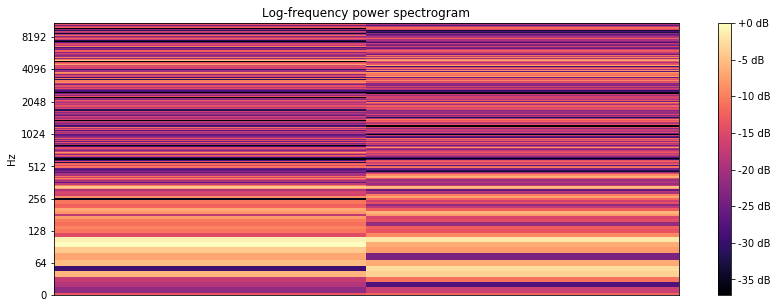

In [30]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(mono)), ref=np.max)

plt.figure(figsize=(14, 5))

librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')


# https://www.life2coding.com/convert-image-frames-video-file-using-opencv-python/
